In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [3]:
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [4]:
list_train = list(train)
list_train

['Booking_ID',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [5]:
# 데이터의 정보 확인(->숫자로 변환여부 결정)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25392 non-null  object 
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  object 
 6   required_car_parking_space            25392 non-null  int64  
 7   room_type_reserved                    25392 non-null  object 
 8   lead_time                             25392 non-null  int64  
 9   arrival_year                          25392 non-null  int64  
 10  arrival_month                         25392 non-null  int64  
 11  arrival_date   

## Object를 categorical로 변경
* booking_status
    * Not_Canceled: 0
    * Cancled: 1

* market_segment_type
    * Online: 1
    * Offline: 0

In [6]:
train_test_data = [train, test]

In [7]:
booking_mapping = {
    "Not_Canceled": 0, "Canceled": 1
}

for dataset in train_test_data:
    dataset['booking_status'] = dataset['booking_status'].map(booking_mapping)

KeyError: 'booking_status'

In [8]:
market_mapping = {
    "Online": 0, "Offline": 1
}

for dataset in train_test_data:
    dataset['market_segment_type'] = dataset['market_segment_type'].map(market_mapping)

In [9]:
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,0.0,0,0,0,90.95,0,1
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,0.0,0,0,0,90.95,1,1
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,0.0,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,1.0,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,0.0,0,0,0,82.28,3,0


In [10]:
# room_type_reserved
roomtype_mapping = {
    "Room_Type 1": 0, "Room_Type 4": 1, 'Other': 0
}

for dataset in train_test_data:
    dataset['room_type_reserved'] = dataset['room_type_reserved'].map(roomtype_mapping)

In [11]:
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,0.0,200,2018,8,29,0.0,0,0,0,90.95,0,1
1,INN06326,2,0,1,3,Meal Plan 1,0,0.0,79,2018,3,24,0.0,0,0,0,90.95,1,1
2,INN33900,2,0,1,4,Meal Plan 1,0,1.0,78,2018,4,6,0.0,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,0.0,61,2017,10,4,1.0,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,0.0,201,2018,11,1,0.0,0,0,0,82.28,3,0


room_type_reserved와 avg_price_per_room은 서로 상관관계가 있을 것임

## 필요없는 column 삭제
* Booking_ID

In [ ]:
# train.drop('Booking_ID')

### 씨본


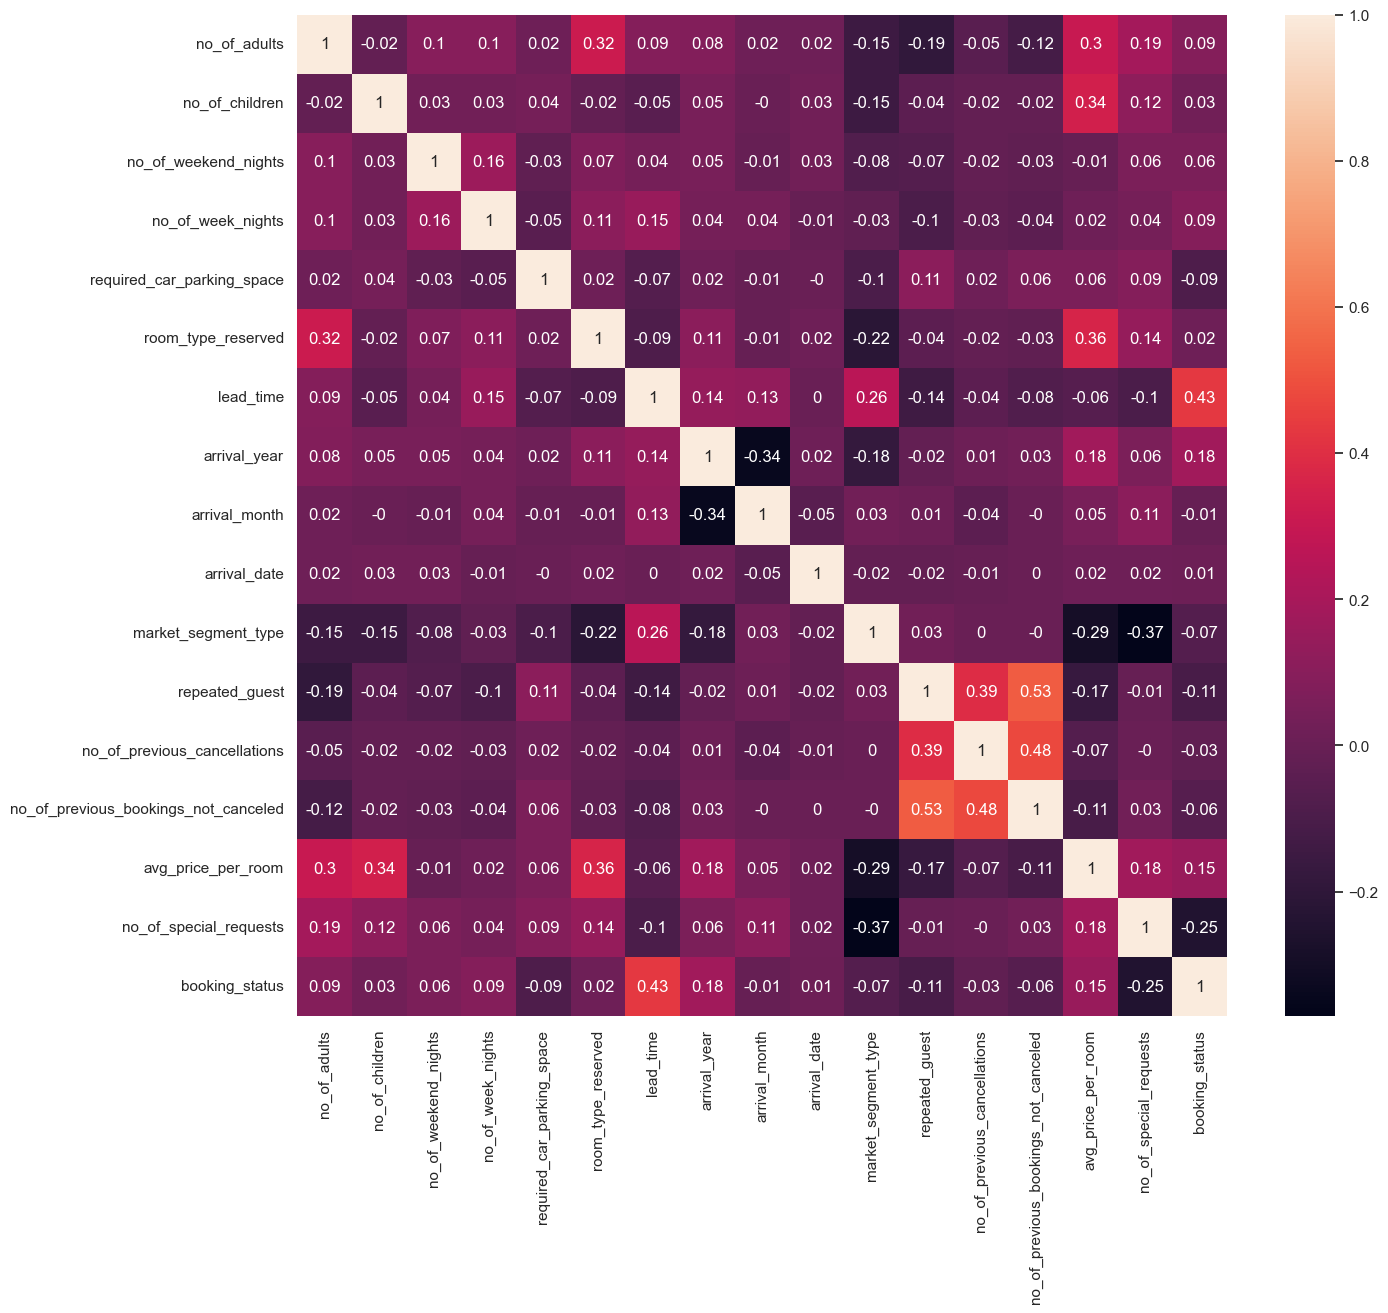

In [12]:
sns.set(rc={'figure.figsize':(15,13)}) 
correlation_matrix = train.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

repeted_guest와 no_of_previous_cancellations은 상관계가 높음
-> 두 attr중에서 하나만 선택(상관관계가 없는) -> 일단 no_of_previous_cancellations 선택

no_of_adults, no_of_children과 avg_price_per_room
-> avg_price_per_room

no_of_previous_cancellation과 no_of_previous_not_cancellation
-> no_of_previous_cancellation 선택

[]

* 근데 왜 모든 칼럼이 안나오지 아 카테고리컬 벨류
* 표준화도 필요

In [ ]:
sns.pairplot(train)
plt.show()